In [17]:

%matplotlib inline
import numpy as np

DQ Analyse
In diesem Notebook werden DQ Analysen durchgeführt

In [18]:

# Lade alle 4 Dateien in eigene Container

from src import dq_analysis_helper, file_management

file_management.unpack_measurement_data_if_needed()
df_null, df_unwucht_1, df_unwucht_2, df_unwucht_3 = file_management.extract_all_measurements()
dfs = [df_null, df_unwucht_1, df_unwucht_2, df_unwucht_3]


c:\Users\tabea\Desktop\paper-dq_trafo_motor_current_1\src\file_management.py:25: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  result = pd.read_csv(csv_file,
c:\Users\tabea\Desktop\paper-dq_trafo_motor_current_1\src\file_management.py:25: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  result = pd.read_csv(csv_file,
c:\Users\tabea\Desktop\paper-dq_trafo_motor_current_1\src\file_management.py:25: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  result = pd.read_csv(csv_file,


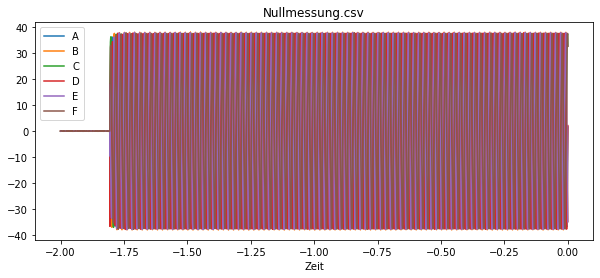

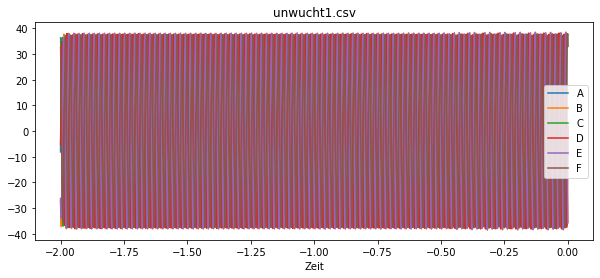

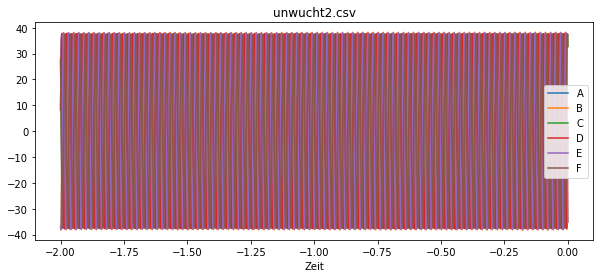

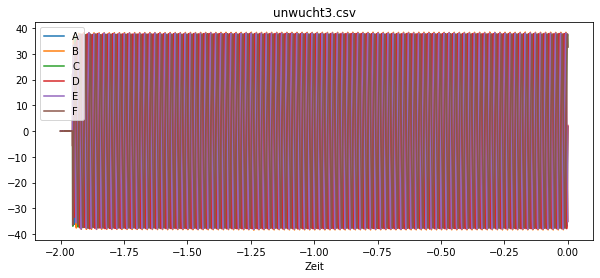

In [19]:
# Stelle alle 4 Dateien als ganzes dar, keine Details
for df in dfs:
    df[(df.index < 0) & (df.index > -2)].plot(figsize=(10,4), title=df.name)

In [20]:
# Multiplikation mit Faktor 24:2,2 -> Dämpfungsverhältnis
for df in dfs:
    df[df.columns] = df[df.columns].mul(24/2.2)

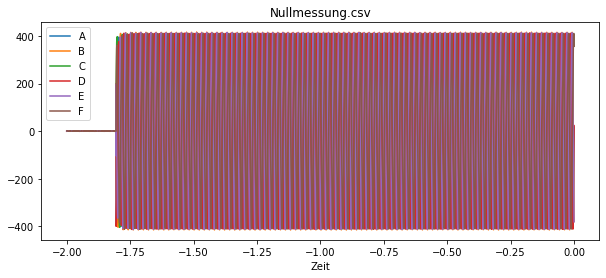

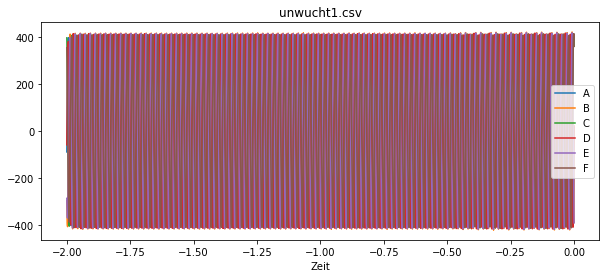

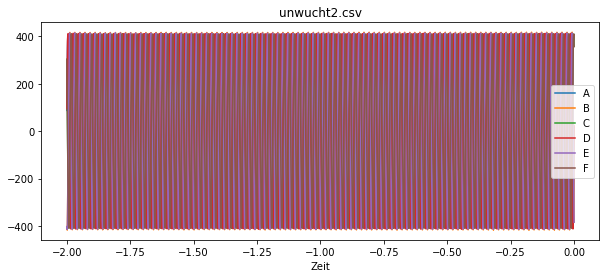

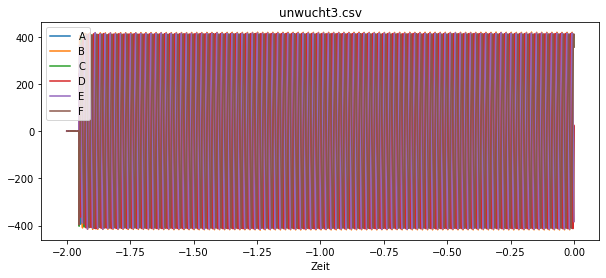

In [21]:
# Stelle alle 4 Dateien als ganzes dar, keine Details
for df in dfs:
    df[(df.index < 0) & (df.index > -2)].plot(figsize=(10,4), title=df.name)

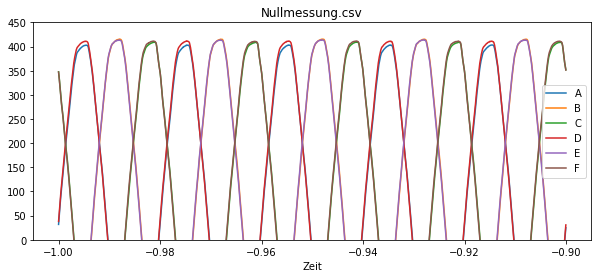

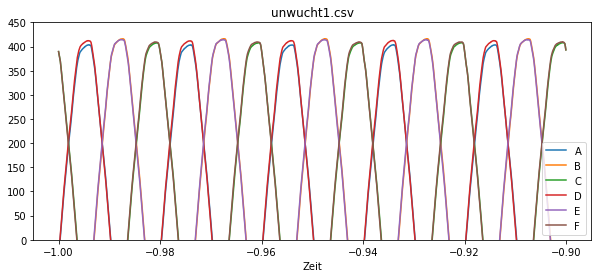

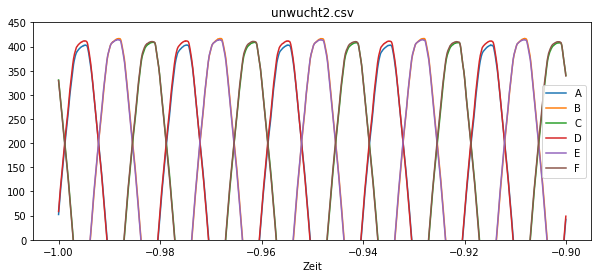

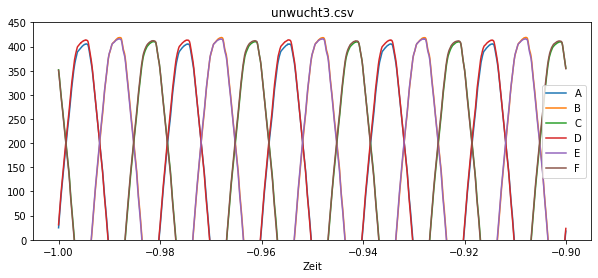

In [22]:
# Darstellung eines Auschnittes von oberen Halbwellen
# Ziel: 3 Wellen werden durch 6 Linien dargestellt, welche eine Differenz aufweisen
for df in dfs:
    df[(df.index < -0.9) & (df.index > -1)].plot(figsize=(10,4), title=df.name, ylim = (0,450))

In [23]:
# Berechnung der Differenzen von U1/4, U2/5, U3/6
for df in dfs:
    df["U1-4"] = df.iloc[:, 1]-df.iloc[:, 4]
    df["U2-5"] = df.iloc[:, 2]-df.iloc[:, 5]
    df["U3-6"] = df.iloc[:, 3]-df.iloc[:, 6]

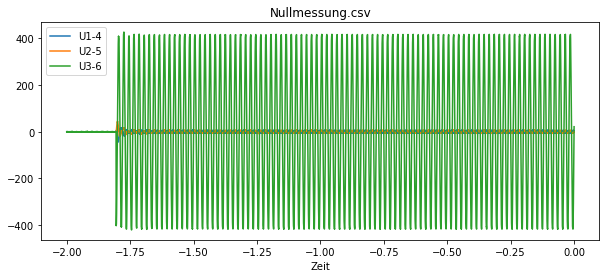

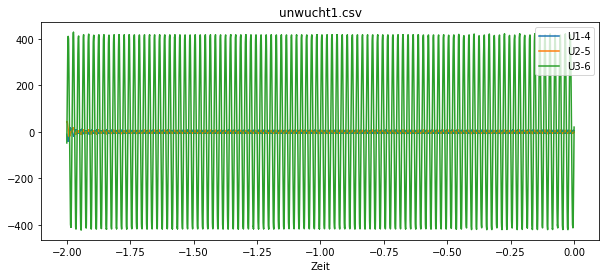

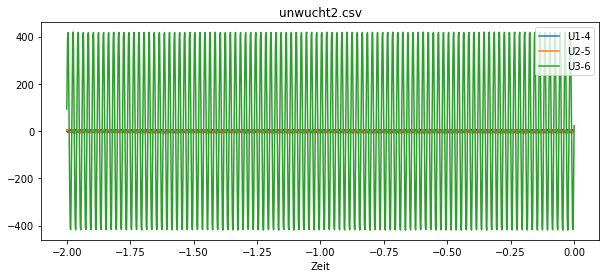

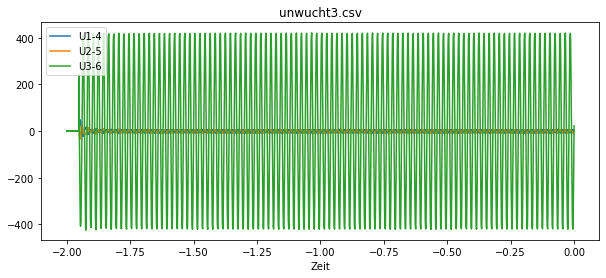

In [24]:
# Darstellung der Differenzen als ganzes, ohne Details
differenz_cols = ["U1-4","U2-5", "U3-6"]
orginal_cols = ["A", "B", "C", "D", "E", "F"]
for df in dfs:
    df[(df.index < 0) & (df.index > -2)][differenz_cols].plot(figsize=(10,4), title=df.name)

In [25]:
# Multiplikation mit 1 Ohm -> Ergibt Strom, Spannungsabfall über Shunt 1 Ohm
# No change of numbers needed

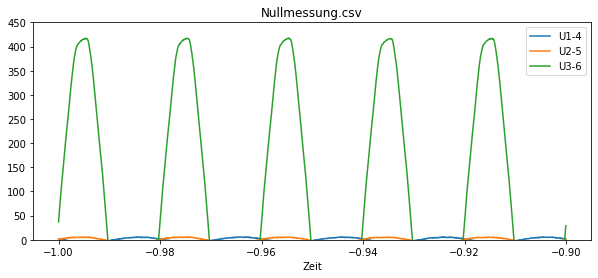

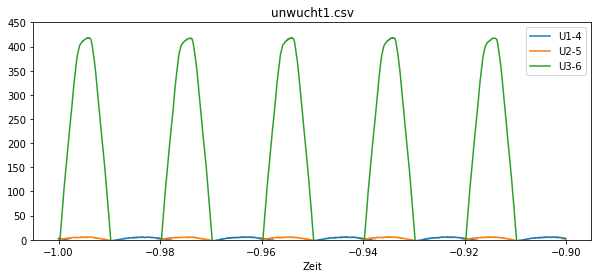

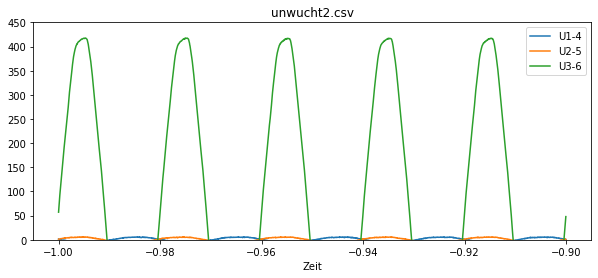

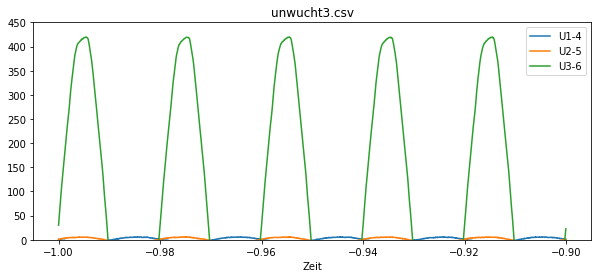

In [26]:
# Darstellung der Differenzen als Ausschnitt, 3 Halbwellen
for df in dfs:
    df[(df.index < -0.9) & (df.index > -1)][differenz_cols].plot(figsize=(10,4), title=df.name, ylim = (0,450))

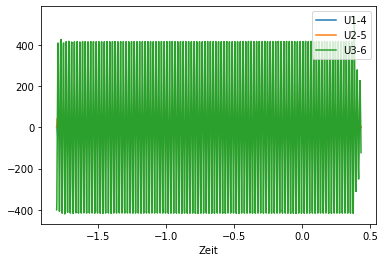

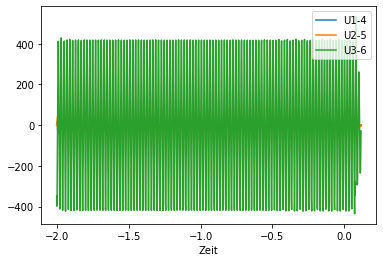

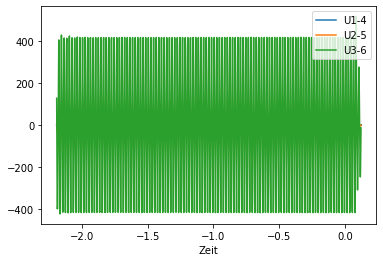

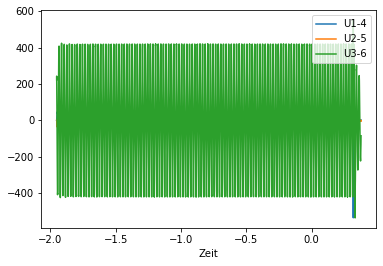

In [39]:
# Anlaufvorgang und Abschaltvorgang wegschneiden
for df in dfs:
    start_all = 1
    stop_all = 0
    for col in df[orginal_cols].columns:
        start, stop = df.loc[df[col] >= 0.5 * df[col].max()].index[[0, -1]].values
        start_all = start if start < start_all else start_all
        stop_all = stop if stop > stop_all else stop_all
    df = df.loc[(df.index >=start_all) & (df.index <= stop_all)]
    df[differenz_cols].plot()

109.64001848788874 130.17538880479447


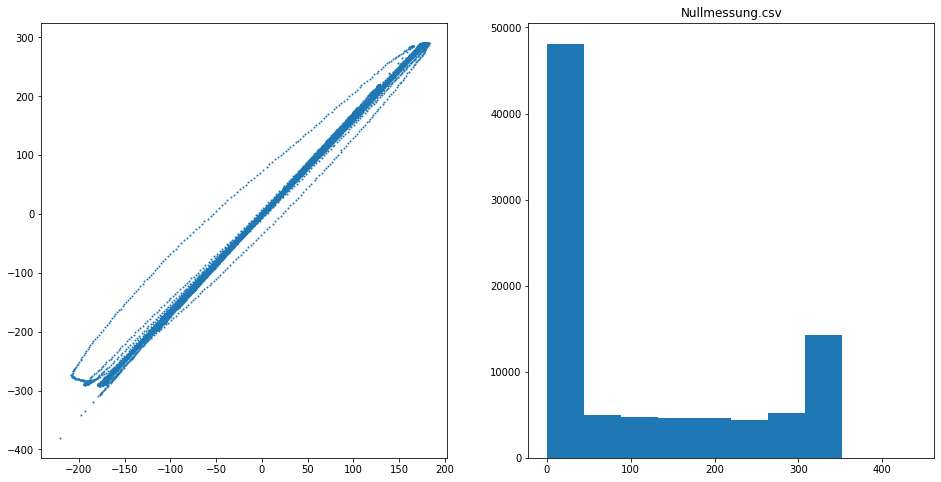

117.13554812499052 131.6863531591601


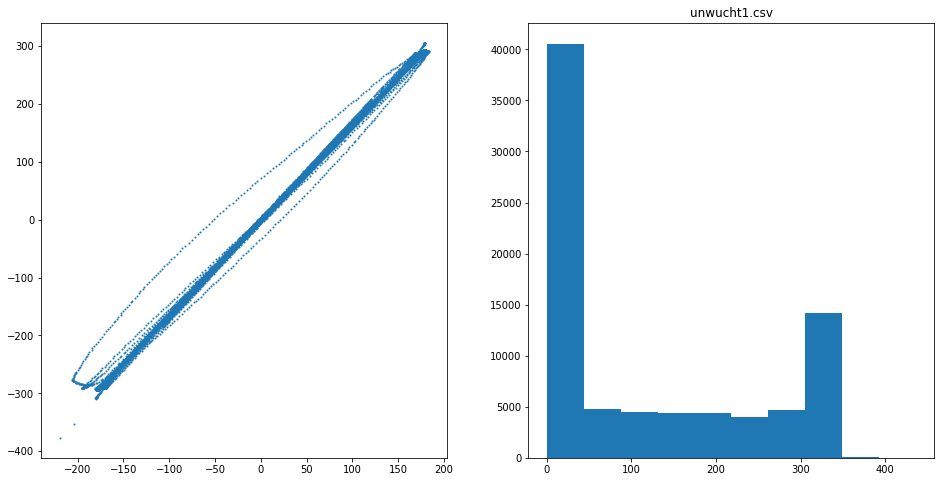

124.34932854582982 132.43155065397502


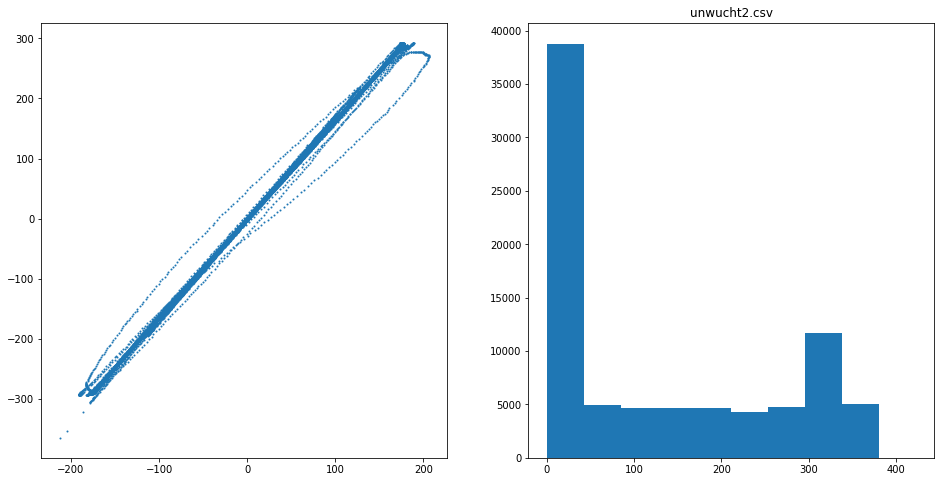

124.51566141291009 132.5149736844168


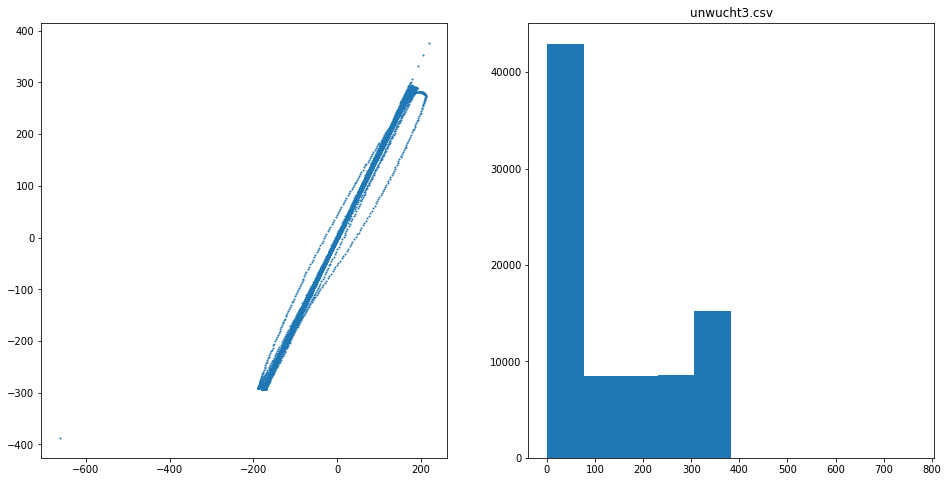

In [43]:
# Erstelle 4 DQ Diagramme
from matplotlib import pyplot as plt
from src import ESA
for idx, df in enumerate(dfs):
    fig, ax = plt.subplots(ncols=2, figsize=(16,8))
    i_d, i_q = ESA.dq(df[differenz_cols[0]], df[differenz_cols[1]], df[differenz_cols[2]])
    ax[0].scatter(i_d, i_q, s=1)
    plt.title(df.name)
    r = zip(i_d, i_q)
    r = np.array([np.sqrt(a**2 + b**2) for a,b in r])
    print(r.mean(), r.std())
    ax[1].hist(r)
    plt.show()
    

In [29]:
# Breite des DQ Rings messen

In [30]:
# Korrelation mit Kreis bestimmen. Prameter des Kreises: reite des Kreises soll eine Gausverteilung 
# mit Std-Abw von 50% der Breite des DQ-Ringes sein. Radius des Ringes soll so gewählt werden, dass die Korrelation maximal wird.